<a href="https://colab.research.google.com/github/dvthu01/DS3010/blob/main/DS3010_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
# Read in .csv file and print first 5 rows.
df = pd.read_csv('/content/(NEW_DS3010_Final) ds_salaries.csv')

df.head()

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
# Display descriptive statistics of all columns, such as mean, standard deviation, etc.
df.describe(include='all')

,Index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [ ]:
# Displays dataframe info, such as # of rows and columns, and the datatype of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Index               607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
# Data Cleaning. We are dropping the columns [salary] and [salary_currency], as they are irrelevent to our analysis goals.
columns_to_drop = ['salary', 'salary_currency']
df.drop(columns_to_drop, axis=1, inplace=True)

df.head()

,Index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


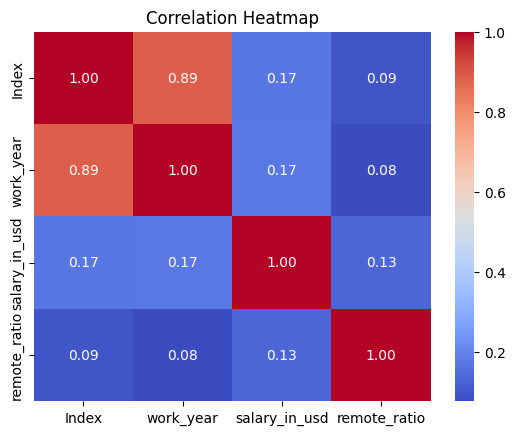

In [ ]:
# Correlation matrix w/ heatmap
## No useful information here

sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Add a new feature called [US_nonUS]. Each entry is equal to 'US' if [company_location] is equal to 'US', and Non-US otherwise.
df['US_nonUS'] = df['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')

df.head()

,Index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,US_nonUS
0,0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,Non-US
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,Non-US
2,2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,Non-US
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S,Non-US
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L,US


In [ ]:
top_job_titles = df['job_title'].value_counts().nlargest(5).index.tolist()


top_job_data = df[df['job_title'].isin(top_job_titles)]


result = top_job_data.groupby(['job_title', 'experience_level']).size().reset_index(name='count')

print(result)

                    job_title experience_level  count
0                Data Analyst               EN     12
1                Data Analyst               EX      2
2                Data Analyst               MI     29
3                Data Analyst               SE     54
4               Data Engineer               EN     12
5               Data Engineer               EX      4
6               Data Engineer               MI     53
7               Data Engineer               SE     63
8              Data Scientist               EN     22
9              Data Scientist               MI     60
10             Data Scientist               SE     61
11  Machine Learning Engineer               EN      9
12  Machine Learning Engineer               MI     12
13  Machine Learning Engineer               SE     20
14         Research Scientist               EN      4
15         Research Scientist               MI      7
16         Research Scientist               SE      5


In [ ]:
data2 = df.groupby('experience_level')['salary_in_usd'].mean()
data2

experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64

In [ ]:
data2 = df.groupby('job_title')['salary_in_usd'].mean()

data2_sorted = data2.sort_values()
print(data2_sorted)

job_title
3D Computer Vision Researcher                 5409.000000
Product Data Analyst                         13036.000000
NLP Engineer                                 37236.000000
Computer Vision Engineer                     44419.333333
Big Data Engineer                            51974.000000
ETL Developer                                54957.000000
Finance Data Analyst                         61896.000000
Data Analytics Engineer                      64799.250000
AI Scientist                                 66135.571429
Data Science Consultant                      69420.714286
BI Data Analyst                              74755.166667
Data Science Engineer                        75803.333333
Business Data Analyst                        76691.200000
Head of Machine Learning                     79039.000000
Machine Learning Developer                   85860.666667
Lead Machine Learning Engineer               87932.000000
Marketing Data Analyst                       88654.000000
Lead

In [ ]:

top_job_titles = df['job_title'].value_counts().nlargest(5).index


filtered_data = df[df['job_title'].isin(top_job_titles)]


data2 = filtered_data.groupby('job_title')['salary_in_usd'].mean()


data2_sorted = data2.sort_values()

print(data2_sorted)


job_title
Data Analyst                  92893.061856
Machine Learning Engineer    104880.146341
Data Scientist               108187.832168
Research Scientist           109019.500000
Data Engineer                112725.000000
Name: salary_in_usd, dtype: float64


In [ ]:
## Below is start of model designing and training

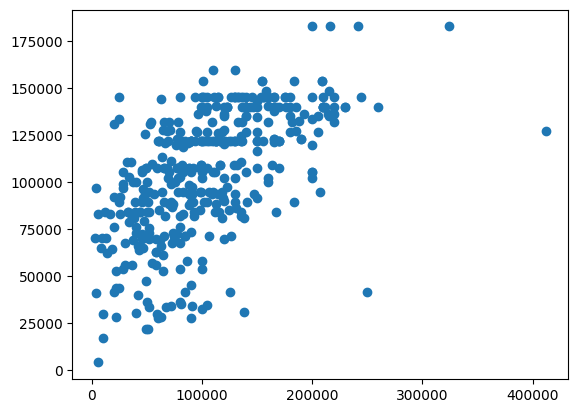

Number of training data: 371
Number of test data: 42


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import torch.nn as nn



Sorted_data = pd.read_csv('/content/EH_final.csv')

Sorted_data.columns


x = torch.unsqueeze(torch.tensor(Sorted_data['salary_in_usd'].values, dtype=torch.float32), dim=1)
y = torch.tensor(Sorted_data['Projection'].values, dtype=torch.float32)

# Plot the data
plt.scatter(x.numpy(), y.numpy())
plt.show()

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, shuffle=True)

# Print the number of training and test data points
print('Number of training data:', len(xtrain))
print('Number of test data:', len(xtest))


In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(n_feature, n_hidden1)   # 1st hidden layer
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)   # 2nd hidden layer
        self.predict = nn.Linear(n_hidden2, n_output)    # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # ReLU activation for 1st hidden layer
        x = F.relu(self.hidden2(x))      # ReLU activation for 2nd hidden layer
        x = self.predict(x).squeeze()    # linear output with squeeze to remove unnecessary dimensions
        return x

# Instantiate the neural network with updated arguments
net = Net(n_feature=1, n_hidden1=20, n_hidden2=20, n_output=1)
print(net)


optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam optimizer
loss_func = torch.nn.MSELoss()

def combinedlistsorting(train, prediction):
    combined_lists = list(zip(train, prediction))

    sorted_combined_lists = sorted(combined_lists, key=lambda x: x[0])

    sorted_list1, sorted_list2 = zip(*sorted_combined_lists)
    return sorted_list1, sorted_list2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
xtrain, ytrain, xtest, ytest = xtrain.to(device), ytrain.to(device), xtest.to(device), ytest.to(device)

# Define the loss function and optimizer
loss_func = nn.MSELoss()

Net(
  (hidden1): Linear(in_features=1, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


Epoch 0, Loss: 13600446464.0


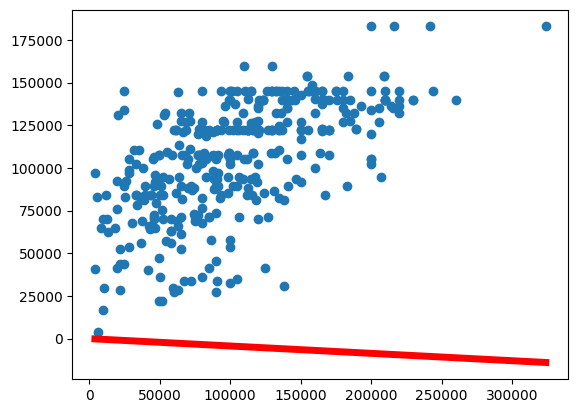

Epoch 5, Loss: 12627582976.0


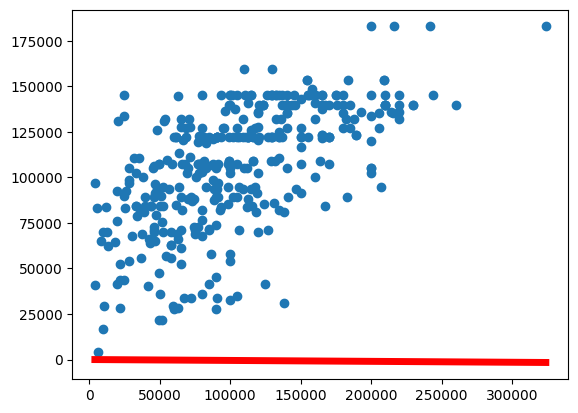

Epoch 10, Loss: 11707779072.0


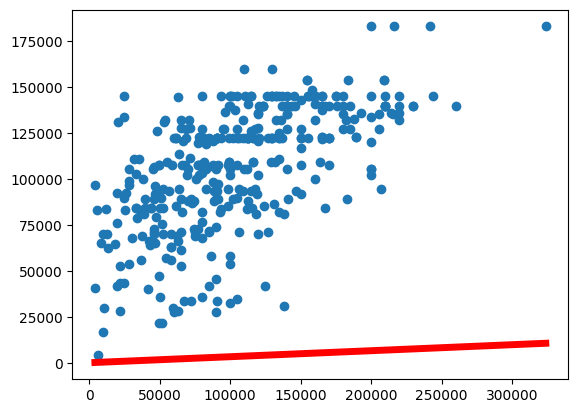

Epoch 15, Loss: 10920272896.0


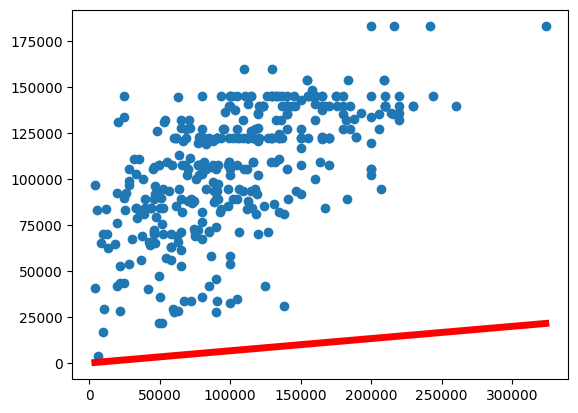

Epoch 20, Loss: 10168088576.0


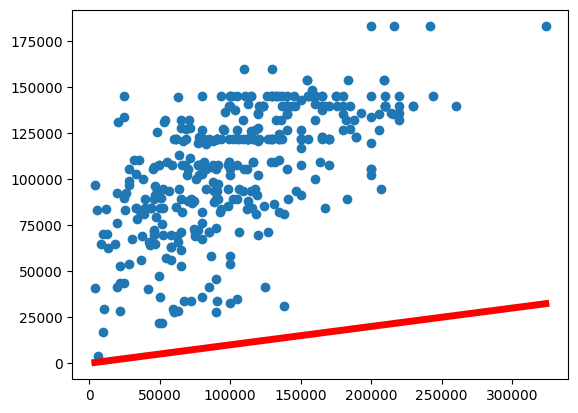

Epoch 25, Loss: 9439397888.0


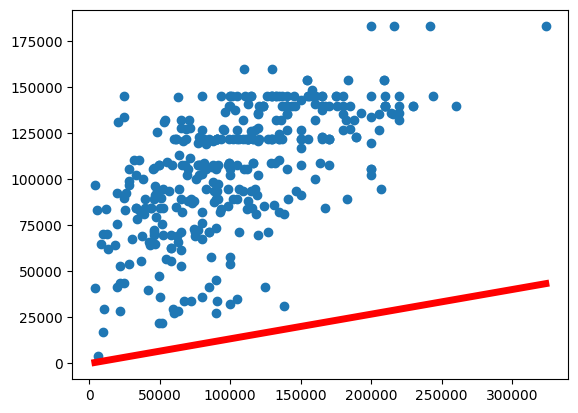

Epoch 30, Loss: 8781386752.0


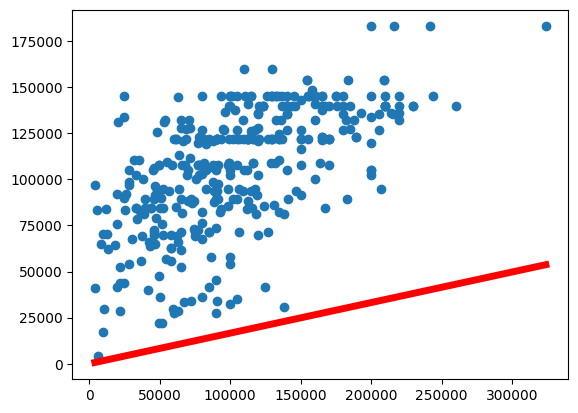

Epoch 35, Loss: 8143663104.0


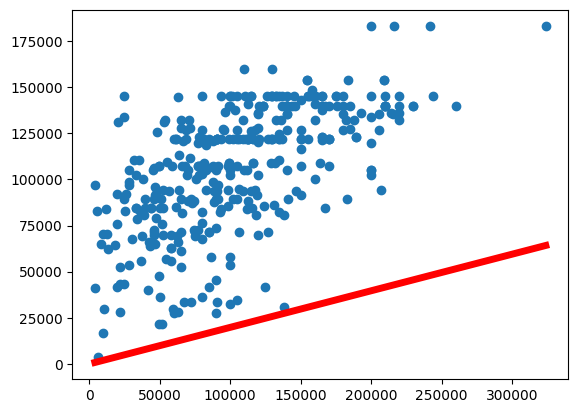

Epoch 40, Loss: 7526246912.0


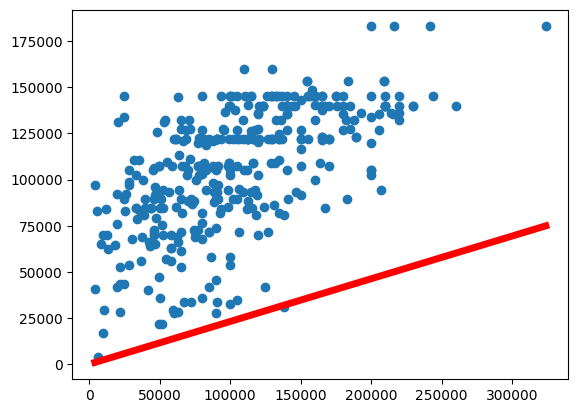

Epoch 45, Loss: 6914239488.0


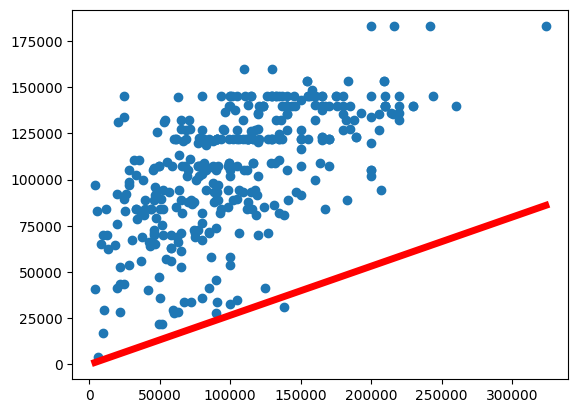

Epoch 50, Loss: 6311267328.0


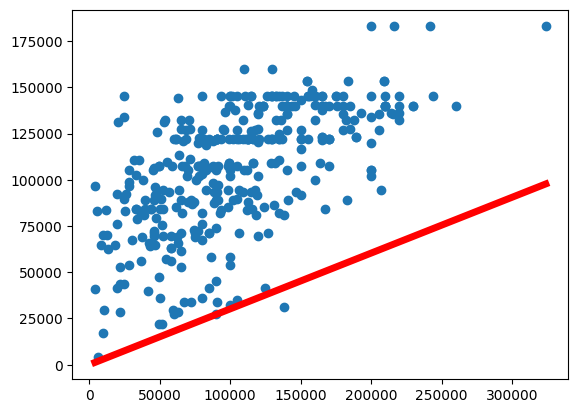

Epoch 55, Loss: 5722172928.0


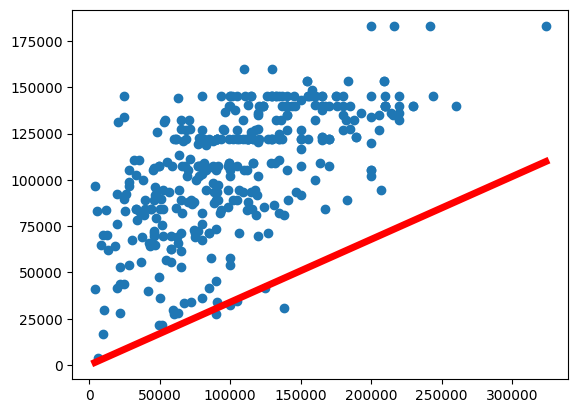

Epoch 60, Loss: 5152861696.0


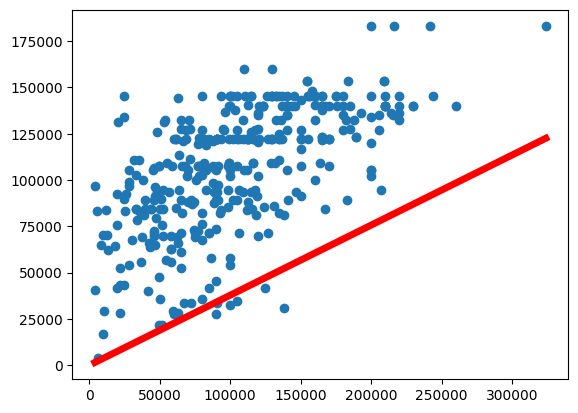

Epoch 65, Loss: 4610042368.0


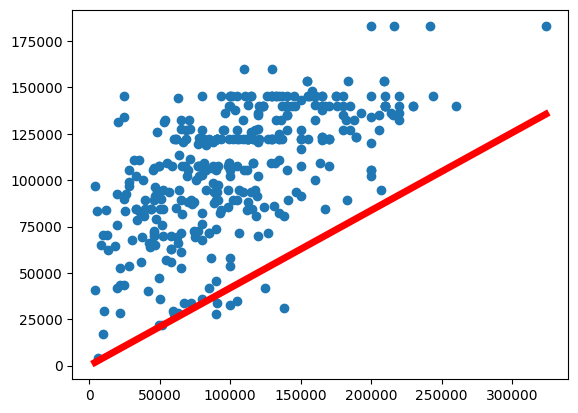

Epoch 70, Loss: 4100865536.0


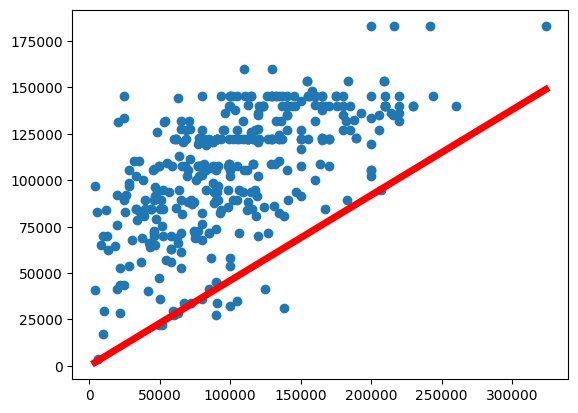

Epoch 75, Loss: 3632456960.0


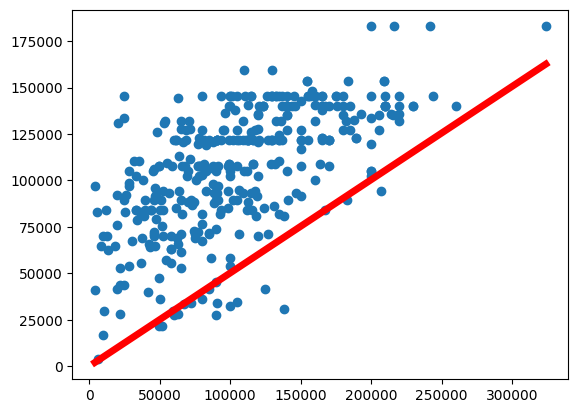

Epoch 80, Loss: 3211361536.0


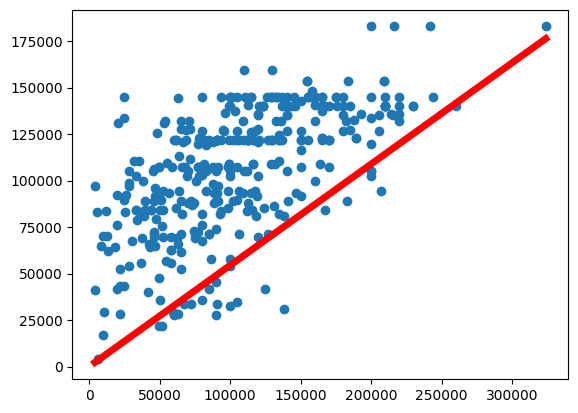

Epoch 85, Loss: 2859737088.0


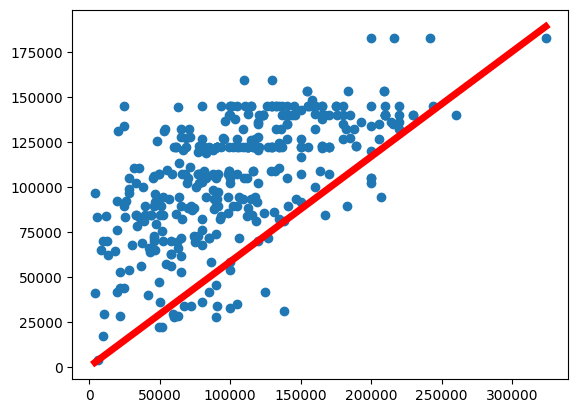

Epoch 90, Loss: 2558044160.0


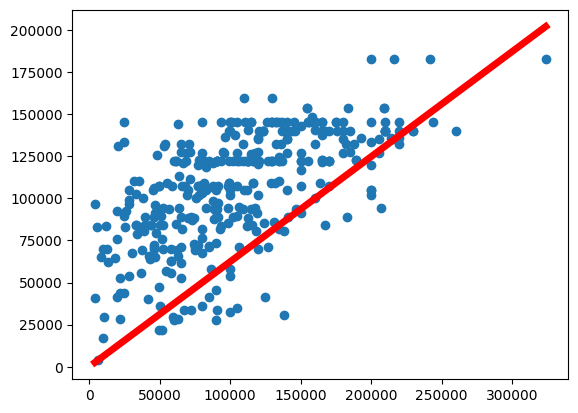

Epoch 95, Loss: 2307852544.0


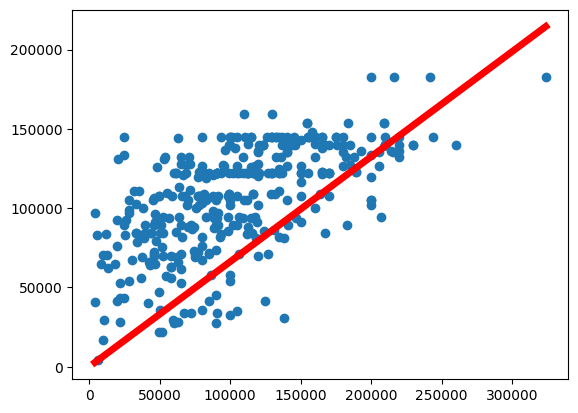

Epoch 100, Loss: 2108581760.0


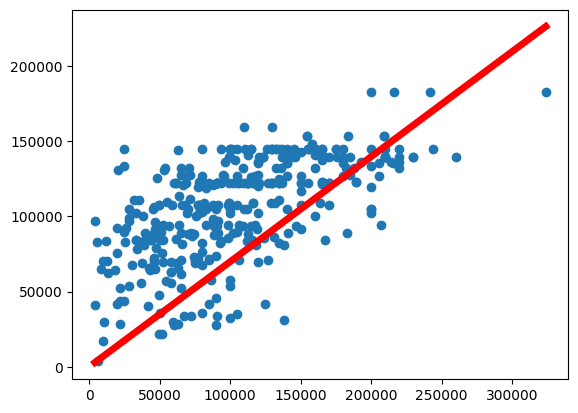

Epoch 105, Loss: 1957154048.0


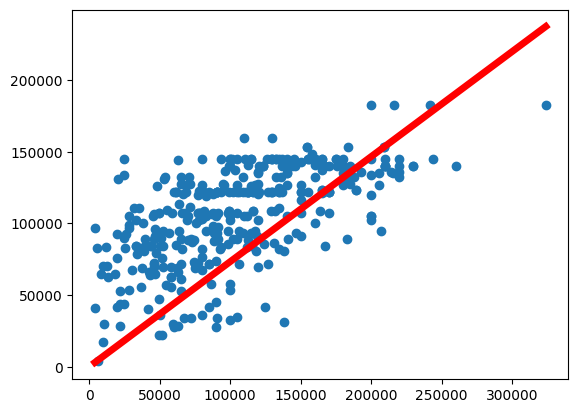

Epoch 110, Loss: 1848223616.0


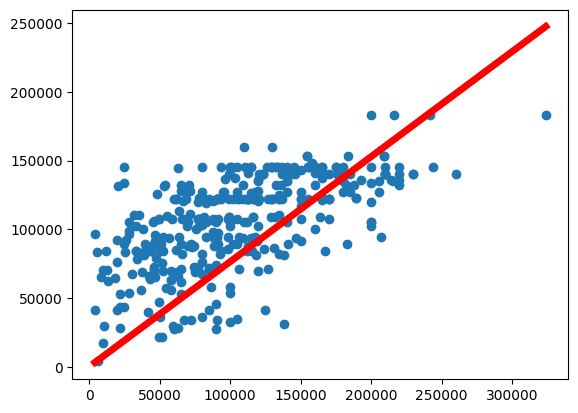

Epoch 115, Loss: 1774755712.0


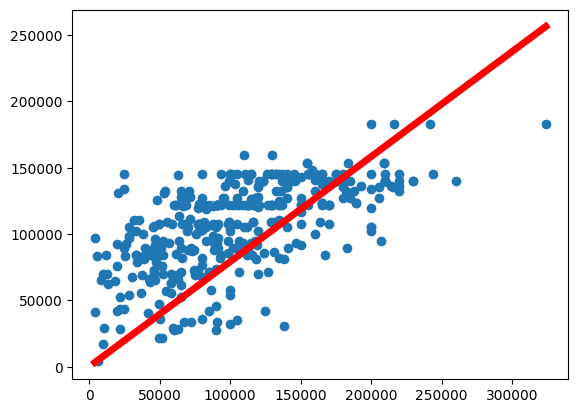

Epoch 120, Loss: 1728873472.0


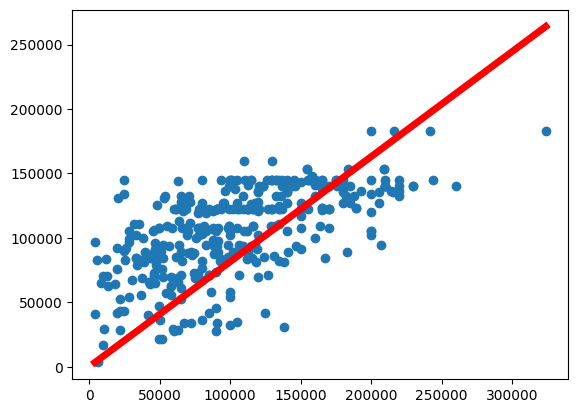

Epoch 125, Loss: 1702804352.0


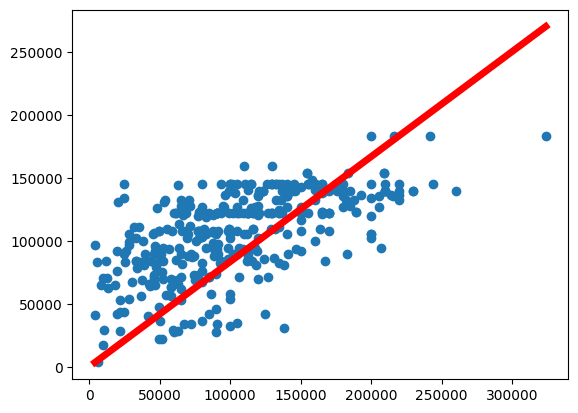

Epoch 130, Loss: 1689707264.0


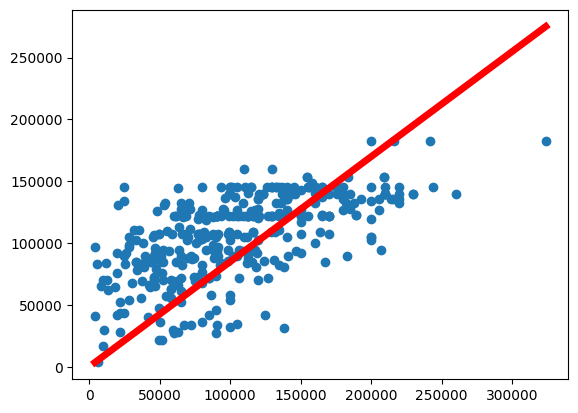

Epoch 135, Loss: 1684206848.0


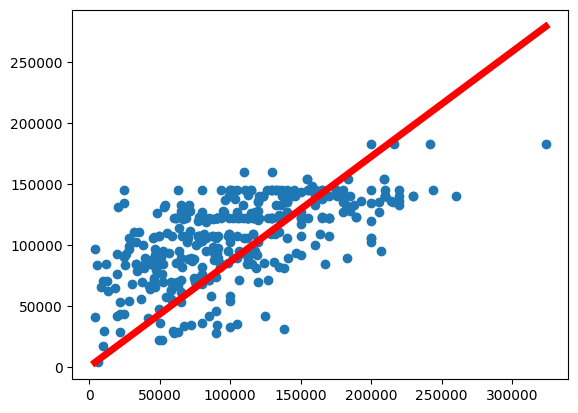

Epoch 140, Loss: 1682551296.0


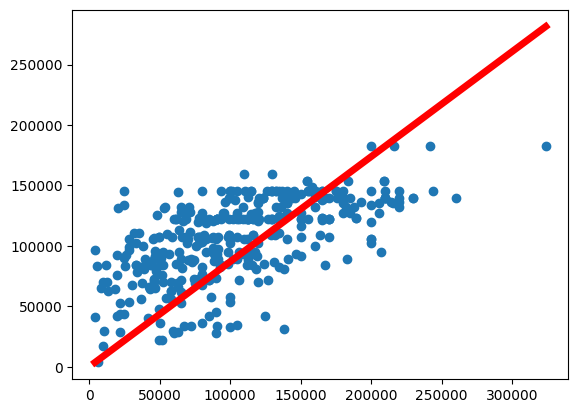

Epoch 145, Loss: 1682453248.0


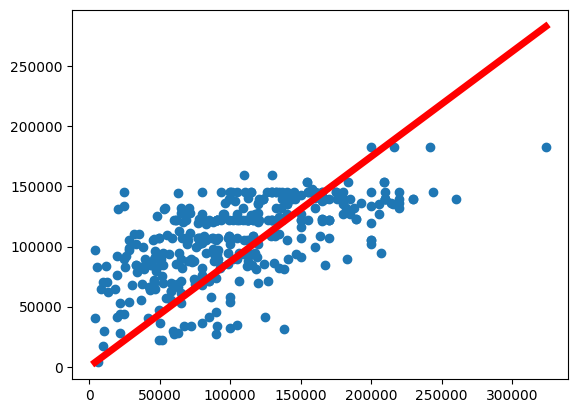

Epoch 150, Loss: 1682734080.0


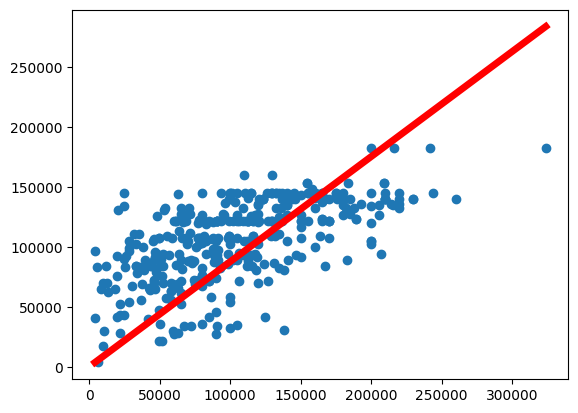

Epoch 155, Loss: 1682927616.0


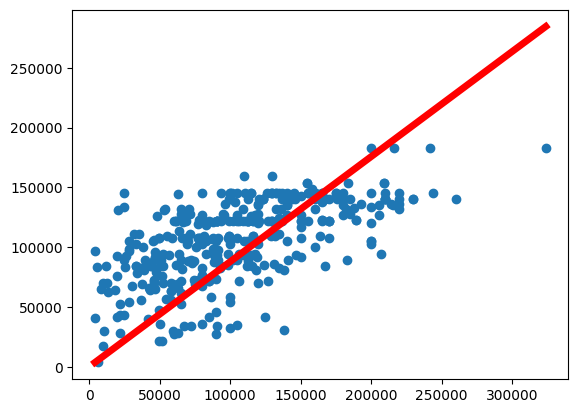

Epoch 160, Loss: 1682943488.0


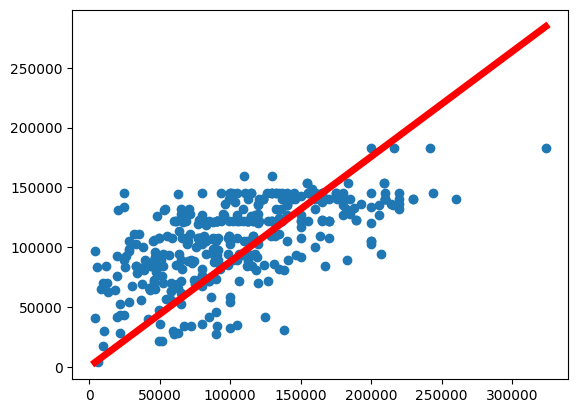

Epoch 165, Loss: 1682839296.0


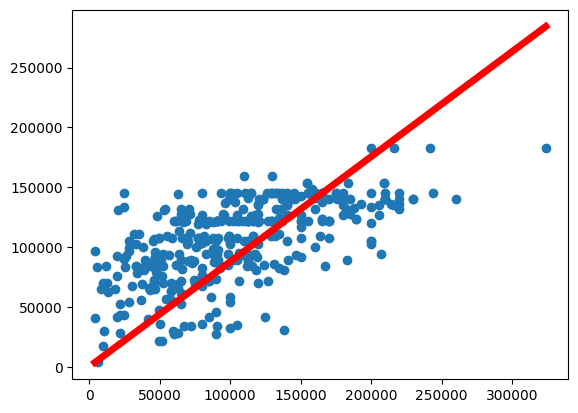

Epoch 170, Loss: 1682696320.0


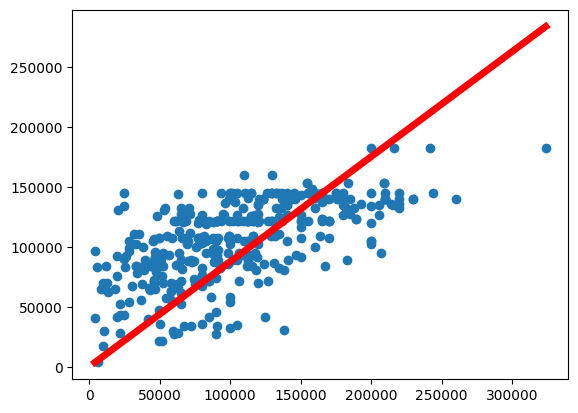

Epoch 175, Loss: 1682569344.0


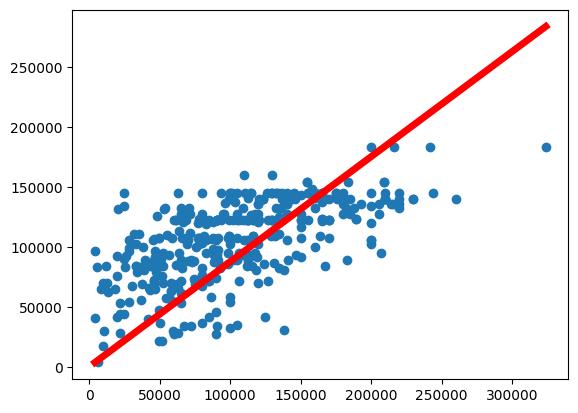

Epoch 180, Loss: 1682480640.0


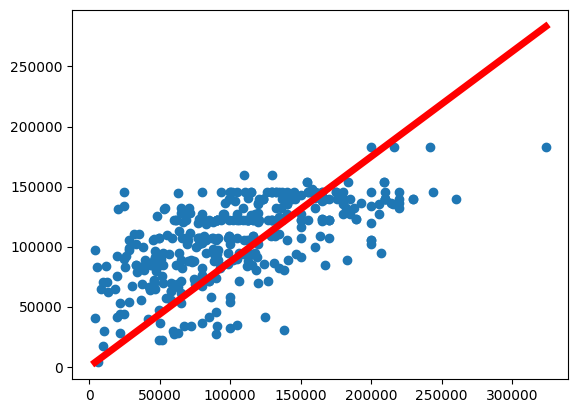

Epoch 185, Loss: 1682429952.0


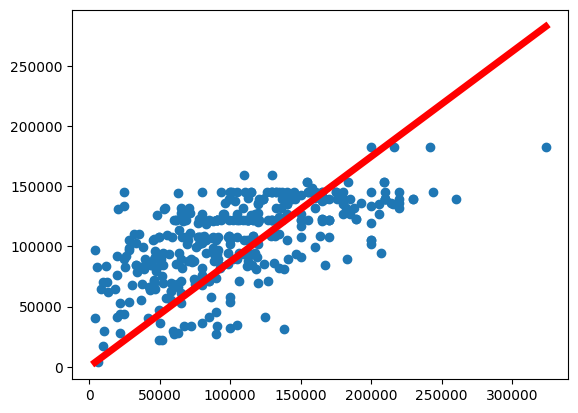

Epoch 190, Loss: 1682406784.0


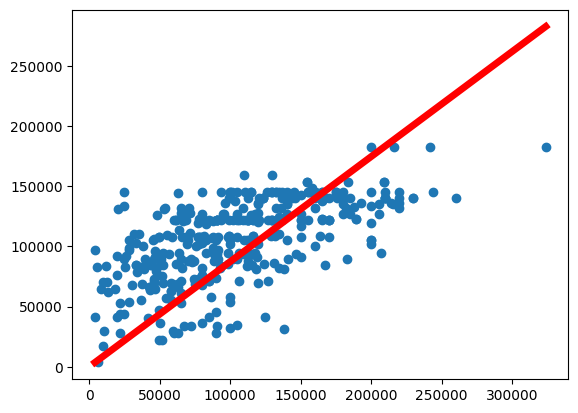

Epoch 195, Loss: 1682399232.0


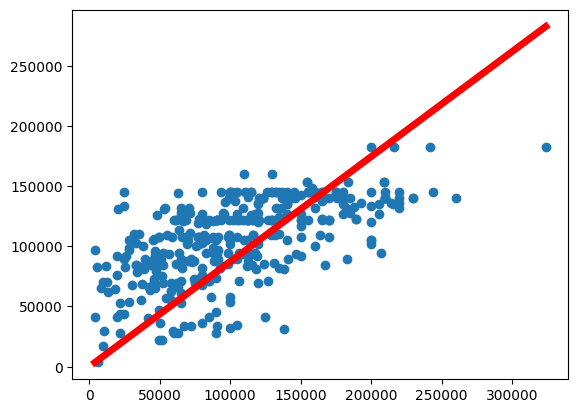

In [ ]:
# Training loop
for t in range(200):
    prediction = net(xtrain)     # input x and predict based on x


    ytrain_squeezed = ytrain.squeeze()

    loss = loss_func(prediction, ytrain_squeezed)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        print(f'Epoch {t}, Loss: {loss.item()}')  # Print the loss value
        plt.cla()
        plt.scatter(xtrain.cpu().data.numpy(), ytrain.cpu().data.numpy())
        sortedtrain, sortedprediction = combinedlistsorting(xtrain.cpu().data.numpy(), prediction.cpu().data.numpy())
        plt.plot(sortedtrain, sortedprediction, 'r-', lw=5)

        plt.pause(0.1)

plt.ioff()
plt.show()


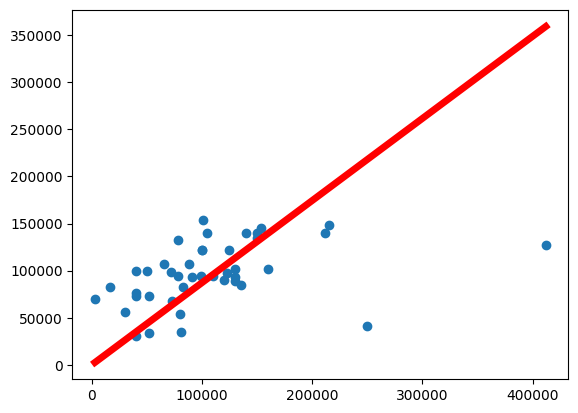

In [ ]:
with torch.no_grad():
    prediction = net(xtest)
    loss = loss_func(prediction, ytest)

    plt.cla()
    plt.scatter(xtest.cpu().data.numpy(), ytest.cpu().data.numpy())
    sortedtest, sortedprediction = combinedlistsorting(xtest.cpu().data.numpy(), prediction.cpu().data.numpy())
    plt.plot(sortedtest, sortedprediction, 'r-', lw=5)
    plt.pause(0.1)


In [ ]:
with torch.no_grad():
    net.eval()

    # Make predictions on the test set
    predictions = net(xtest)

    # Calculate Mean Squared Error (MSE)
    mse = F.mse_loss(predictions.squeeze(), ytest).item()
    print(f'Mean Squared Error (MSE): {mse}')

    # Calculate Mean Absolute Error (MAE)
    mae = F.l1_loss(predictions.squeeze(), ytest).item()
    print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 3224183552.0
Mean Absolute Error (MAE): 37828.16015625
